In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
cols = ["fLength", "fWidth", "fSize", "FCone","FCone1", "fAsym", "fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data", names=cols)

In [49]:
df.head(5)

fLength    fWidth   fSize   FCone  FCone1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [50]:
df.tail(5)

fLength   fWidth   fSize   FCone  FCone1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

In [51]:
df['class'] = (df['class']=='g').astype(int)

In [52]:
df.head()

fLength    fWidth   fSize   FCone  FCone1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

<Axes: >

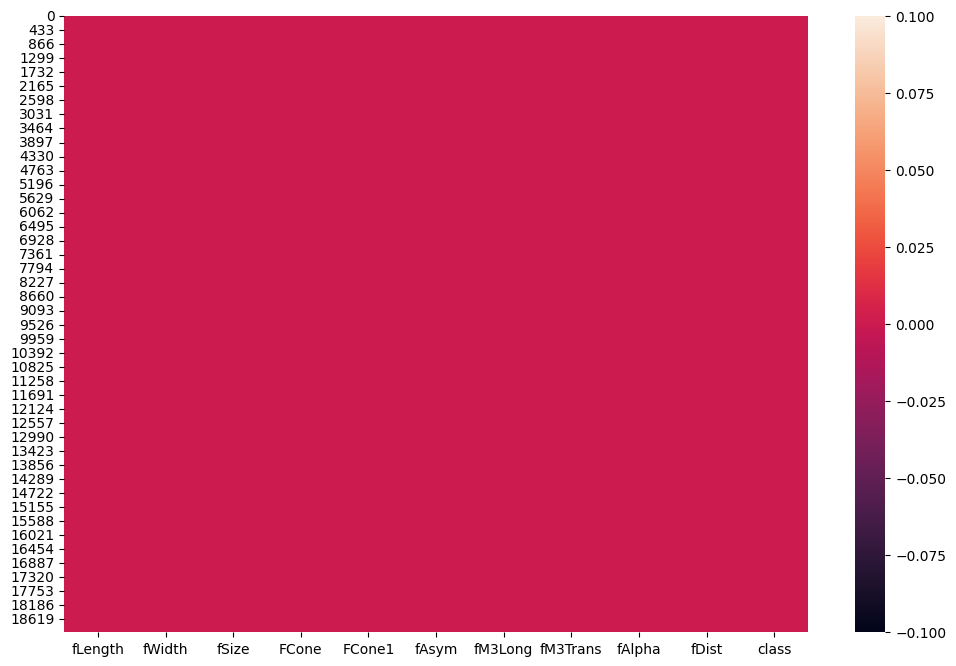

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

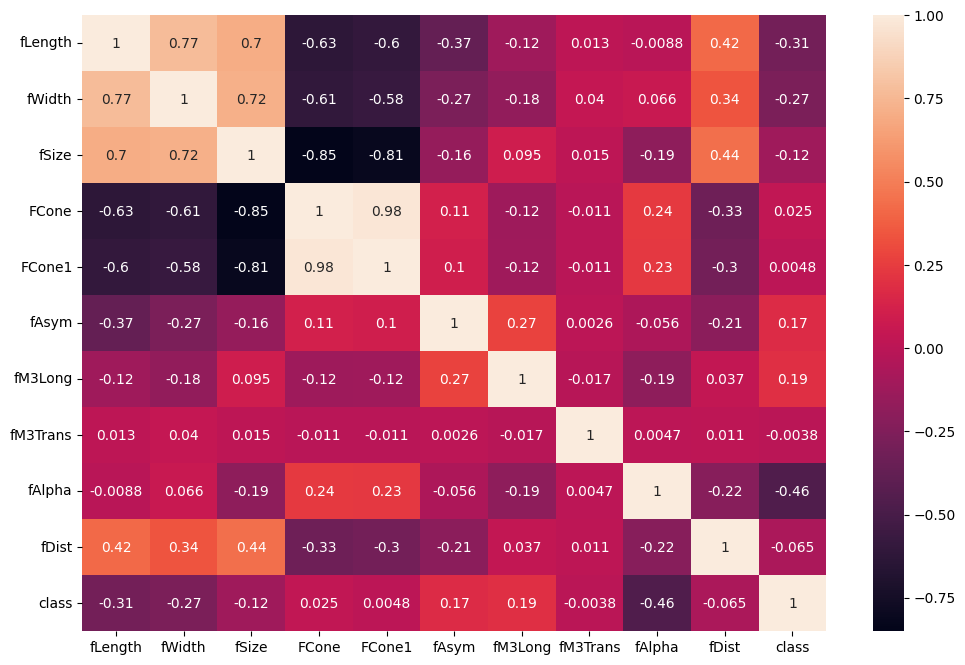

In [86]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

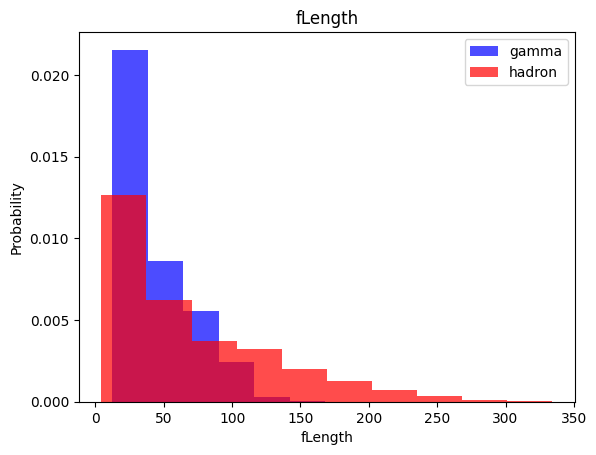

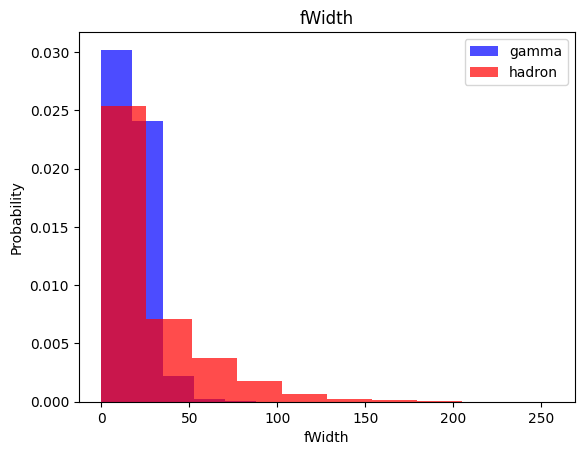

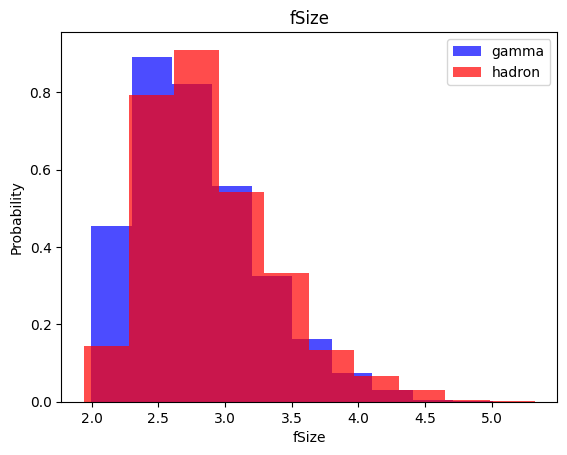

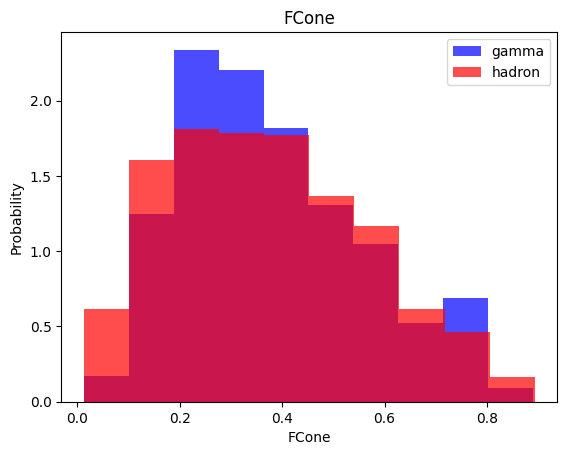

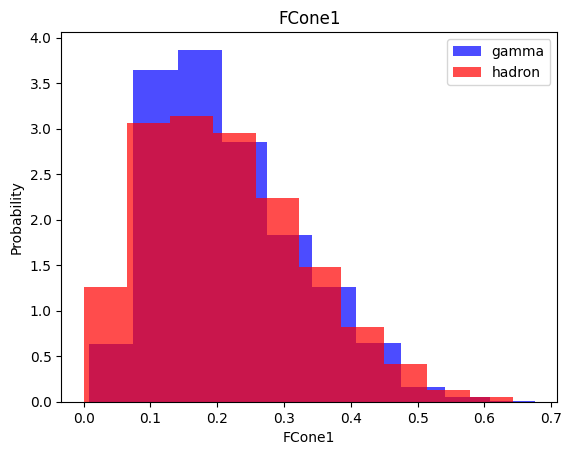

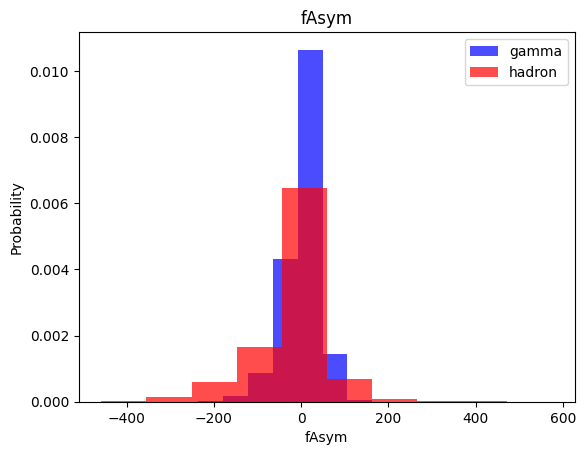

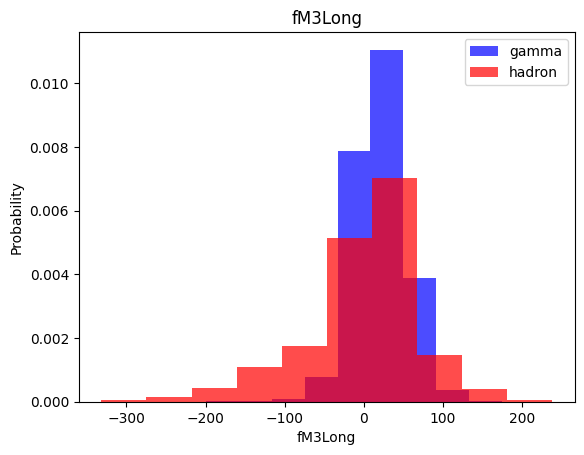

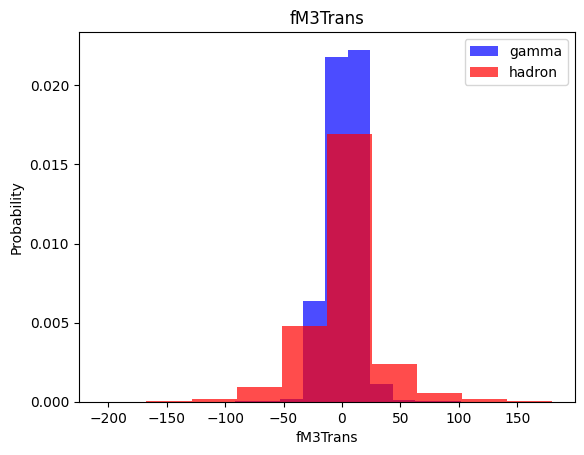

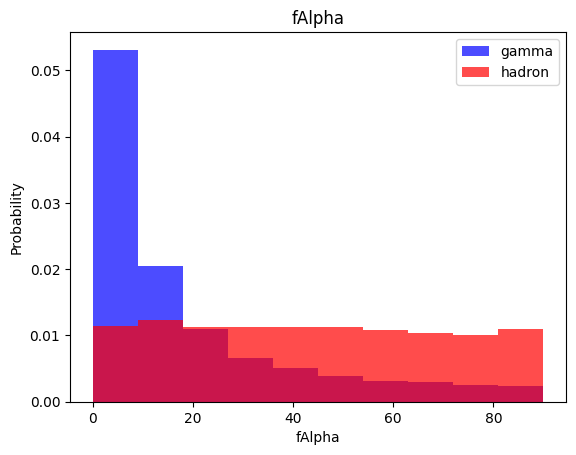

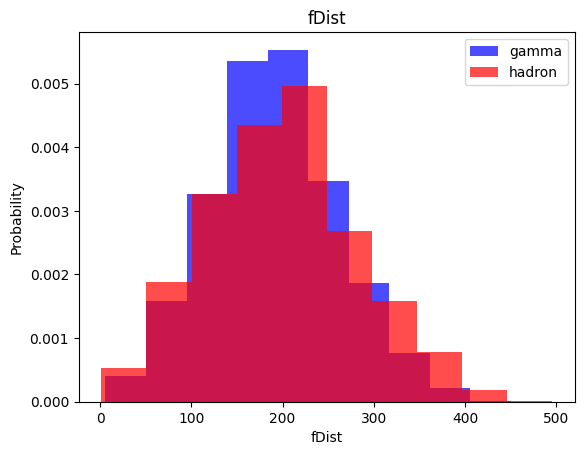

In [54]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

<Axes: xlabel='class', ylabel='count'>

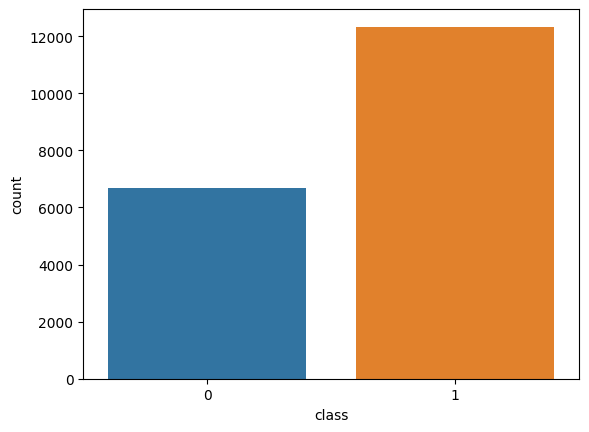

In [87]:
sns.countplot(x="class",data=df)

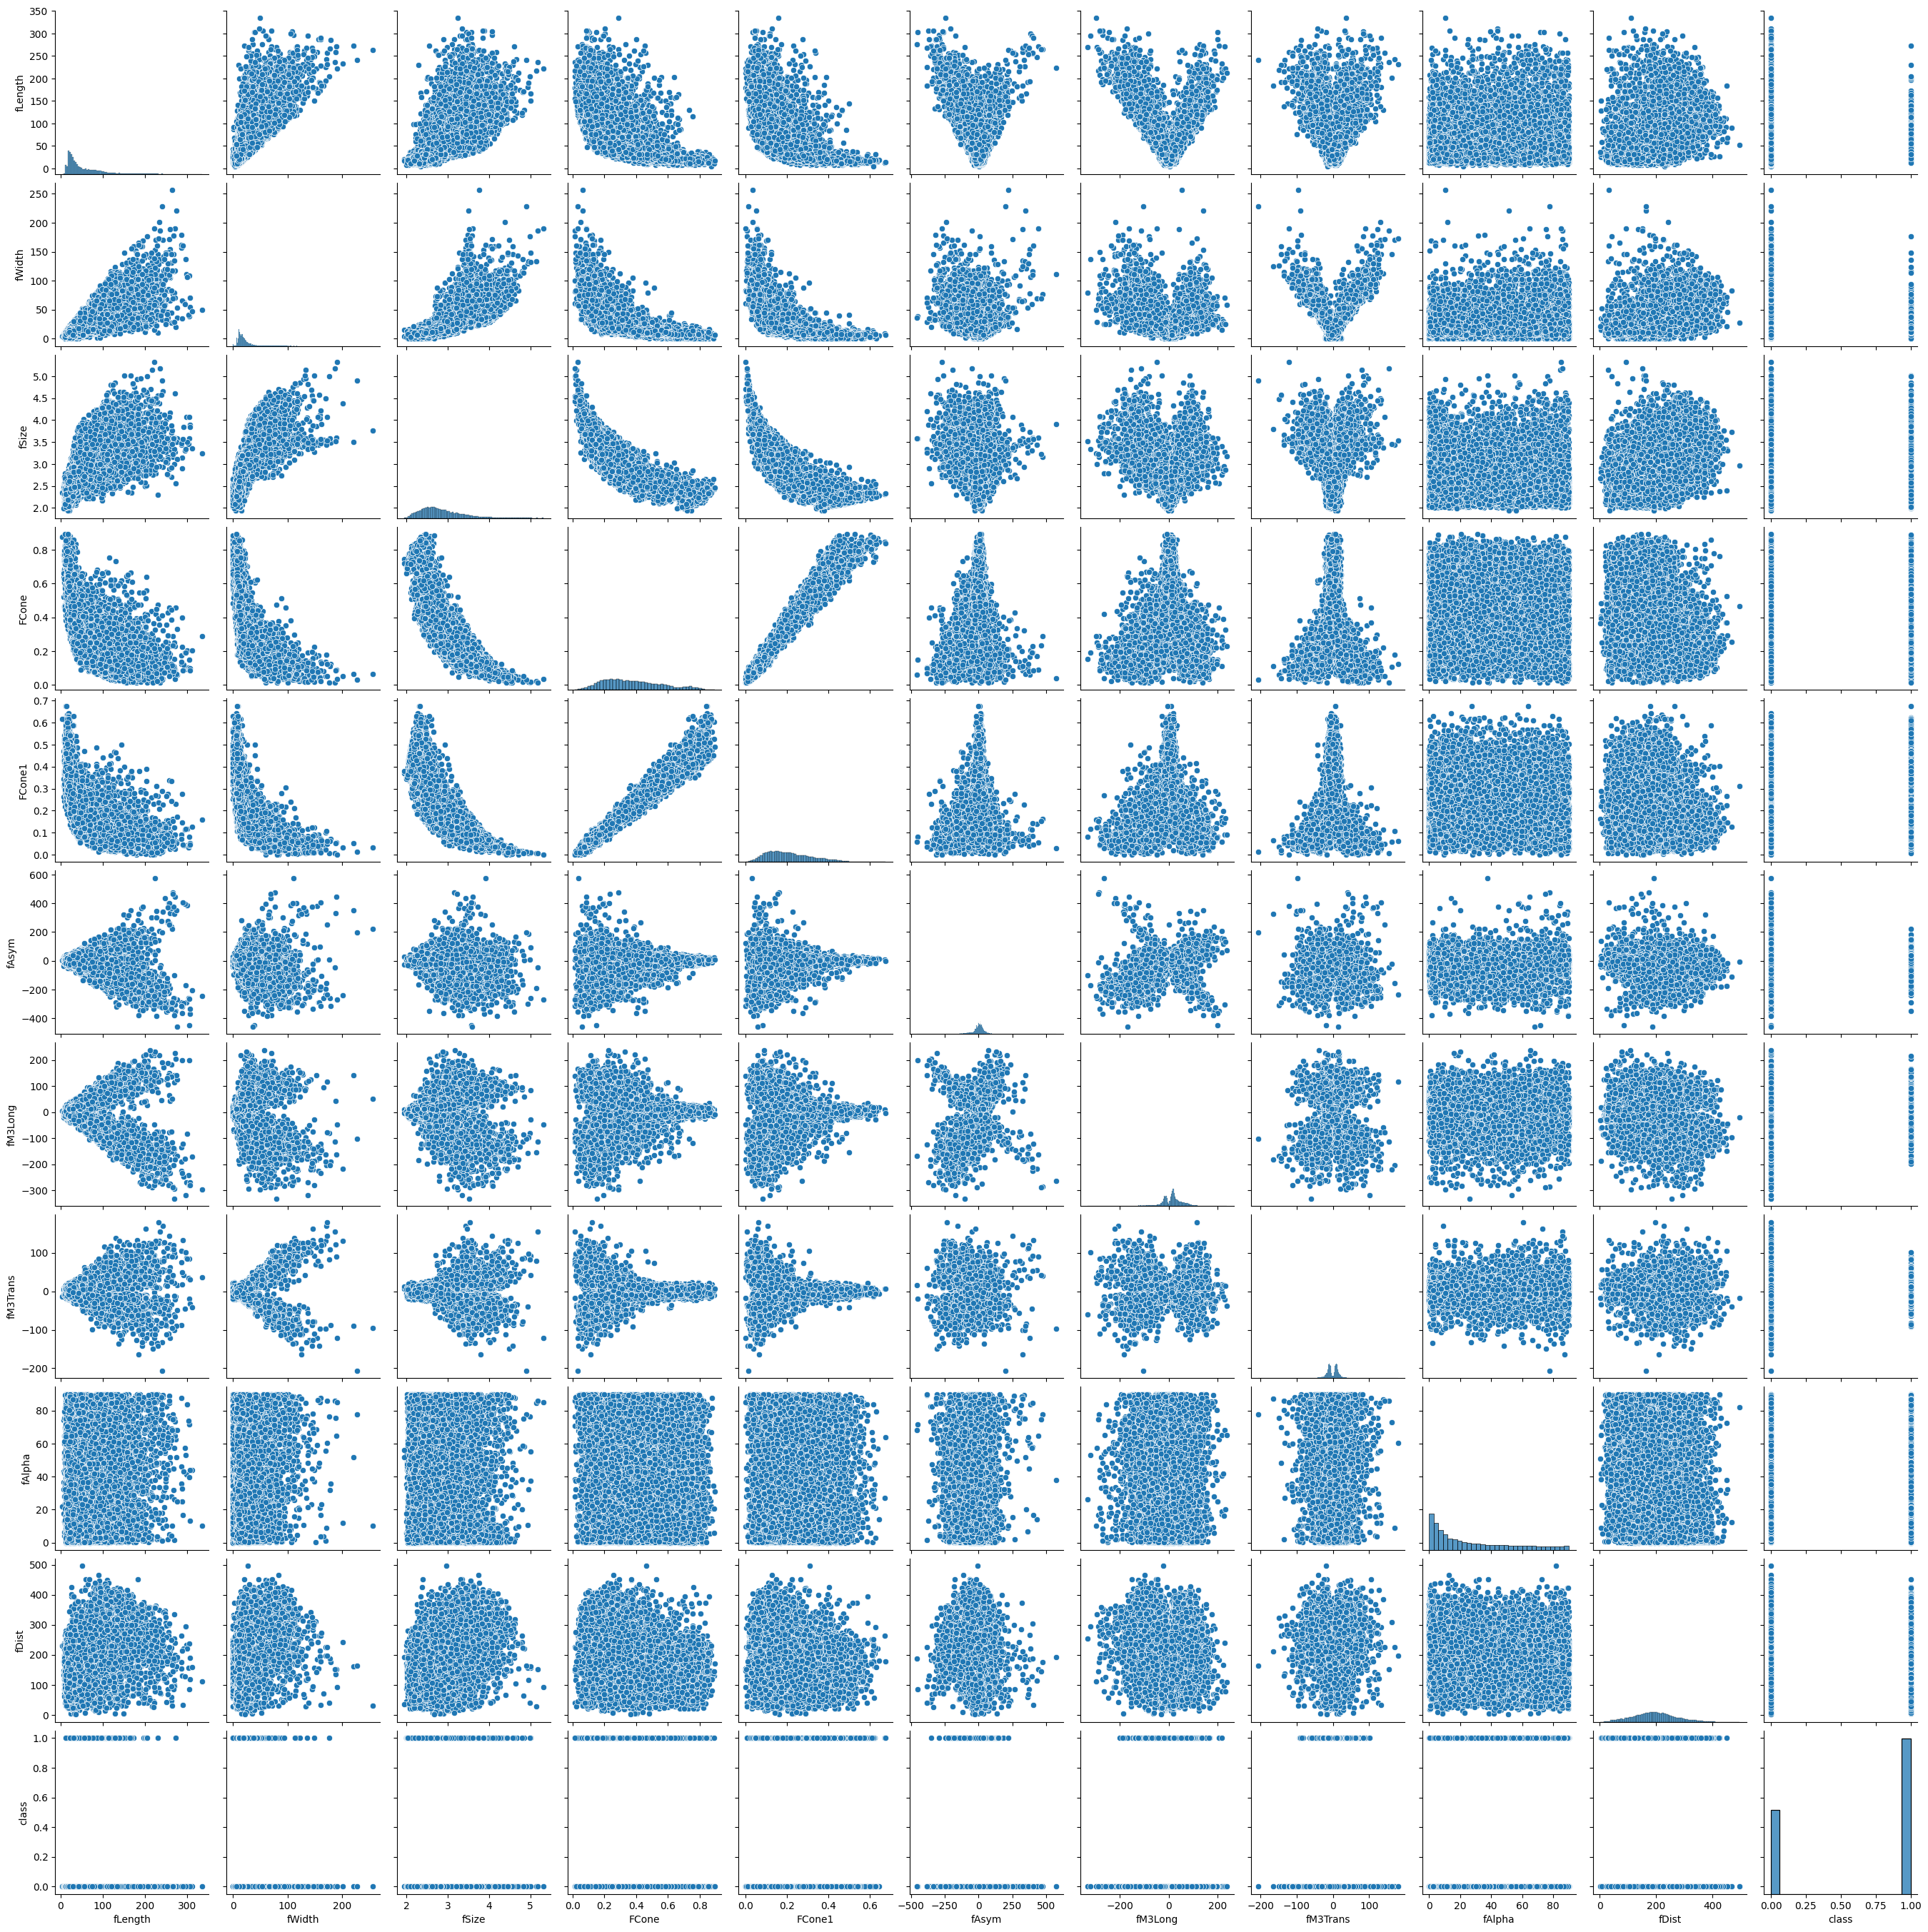

In [90]:
sns.pairplot(df)

#Train, Validation , Test Datasets

In [55]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [56]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [57]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K-NEAREST NEIGHBORS

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn_model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1324
           1       0.86      0.87      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# NAIVE BAYES

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_model

GaussianNB()

In [64]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1324
           1       0.74      0.90      0.81      2480

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
lg_model

LogisticRegression()

In [67]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1324
           1       0.85      0.83      0.84      2480

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SUPPORT VECTOR MACHINE

In [68]:
from sklearn.svm import SVC

In [69]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
svm_model

SVC()

In [70]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1324
           1       0.89      0.89      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# RANDOM FOREST


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [73]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1324
           1       0.89      0.91      0.90      2480

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# ADABOOST CLASSIFIER

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
ada_model = AdaBoostClassifier()
ada_model = ada_model.fit(X_train, y_train)
ada_model

AdaBoostClassifier()

In [76]:
y_pred = ada_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1324
           1       0.89      0.82      0.85      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.82      0.81      3804
weighted avg       0.83      0.82      0.82      3804



# BAGGING CLASSIFIER

In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
bc_model = BaggingClassifier()
bc_model = bc_model.fit(X_train, y_train)
bc_model

BaggingClassifier()

In [79]:
y_pred = bc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1324
           1       0.89      0.87      0.88      2480

    accuracy                           0.84      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.84      0.85      3804



# PERCEPTRON

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

In [81]:
p_model = ExtraTreesClassifier()
p_model = p_model.fit(X_train, y_train)
p_model

ExtraTreesClassifier()

In [82]:
y_pred = p_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1324
           1       0.87      0.94      0.90      2480

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# LINEAR REGRESSION

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)
lr_model

LinearRegression()

In [85]:
y_pred = lr_model.predict(X_test)
print(r2_score(y_test, y_pred))

0.2826215488376712
